# Exploring the Financial History Features in the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns


In [3]:
df = pd.read_csv('/Users/santoshmanne/Desktop/cleaned_data.csv')
pd.set_option('display.max_columns', None)

In [4]:
df.shape


(26664, 30)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1


In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [12]:
s = df.SEX
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})




,counts,per,per100
2,16080,0.60306,60.3%
1,10584,0.39694,39.7%


In [7]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [8]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [9]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [10]:
pay_feats[0]

'PAY_1'

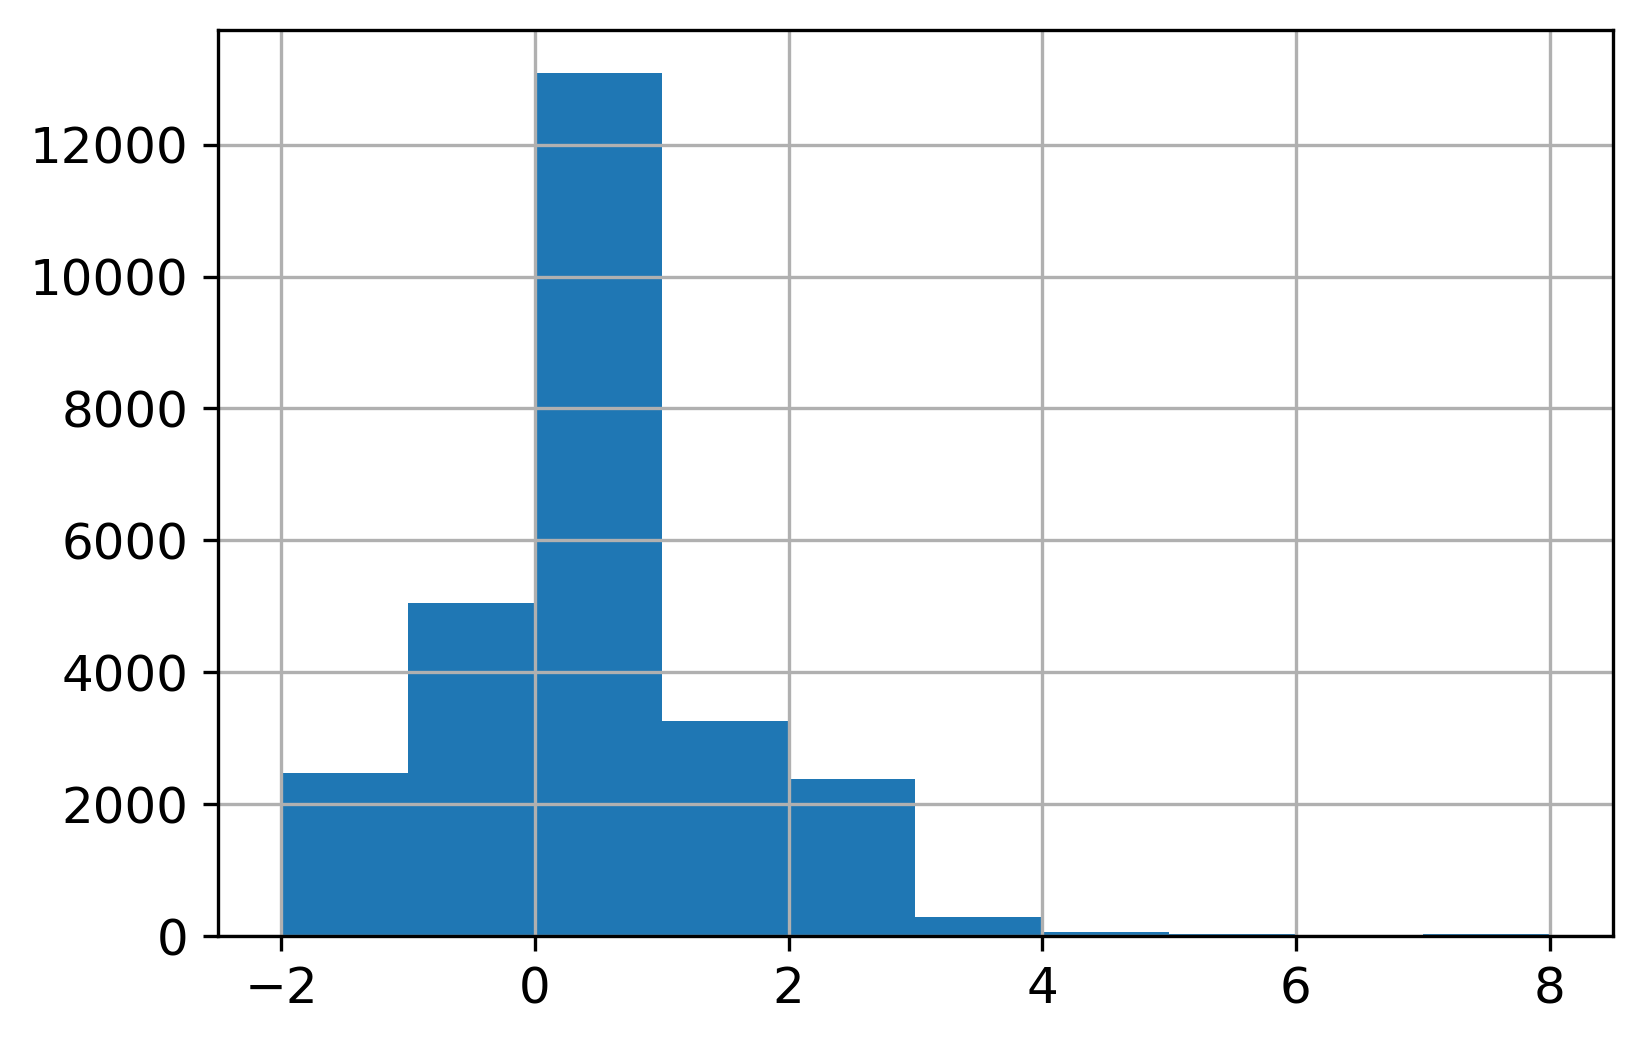

In [11]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 12

df[pay_feats[0]].hist()

In [12]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

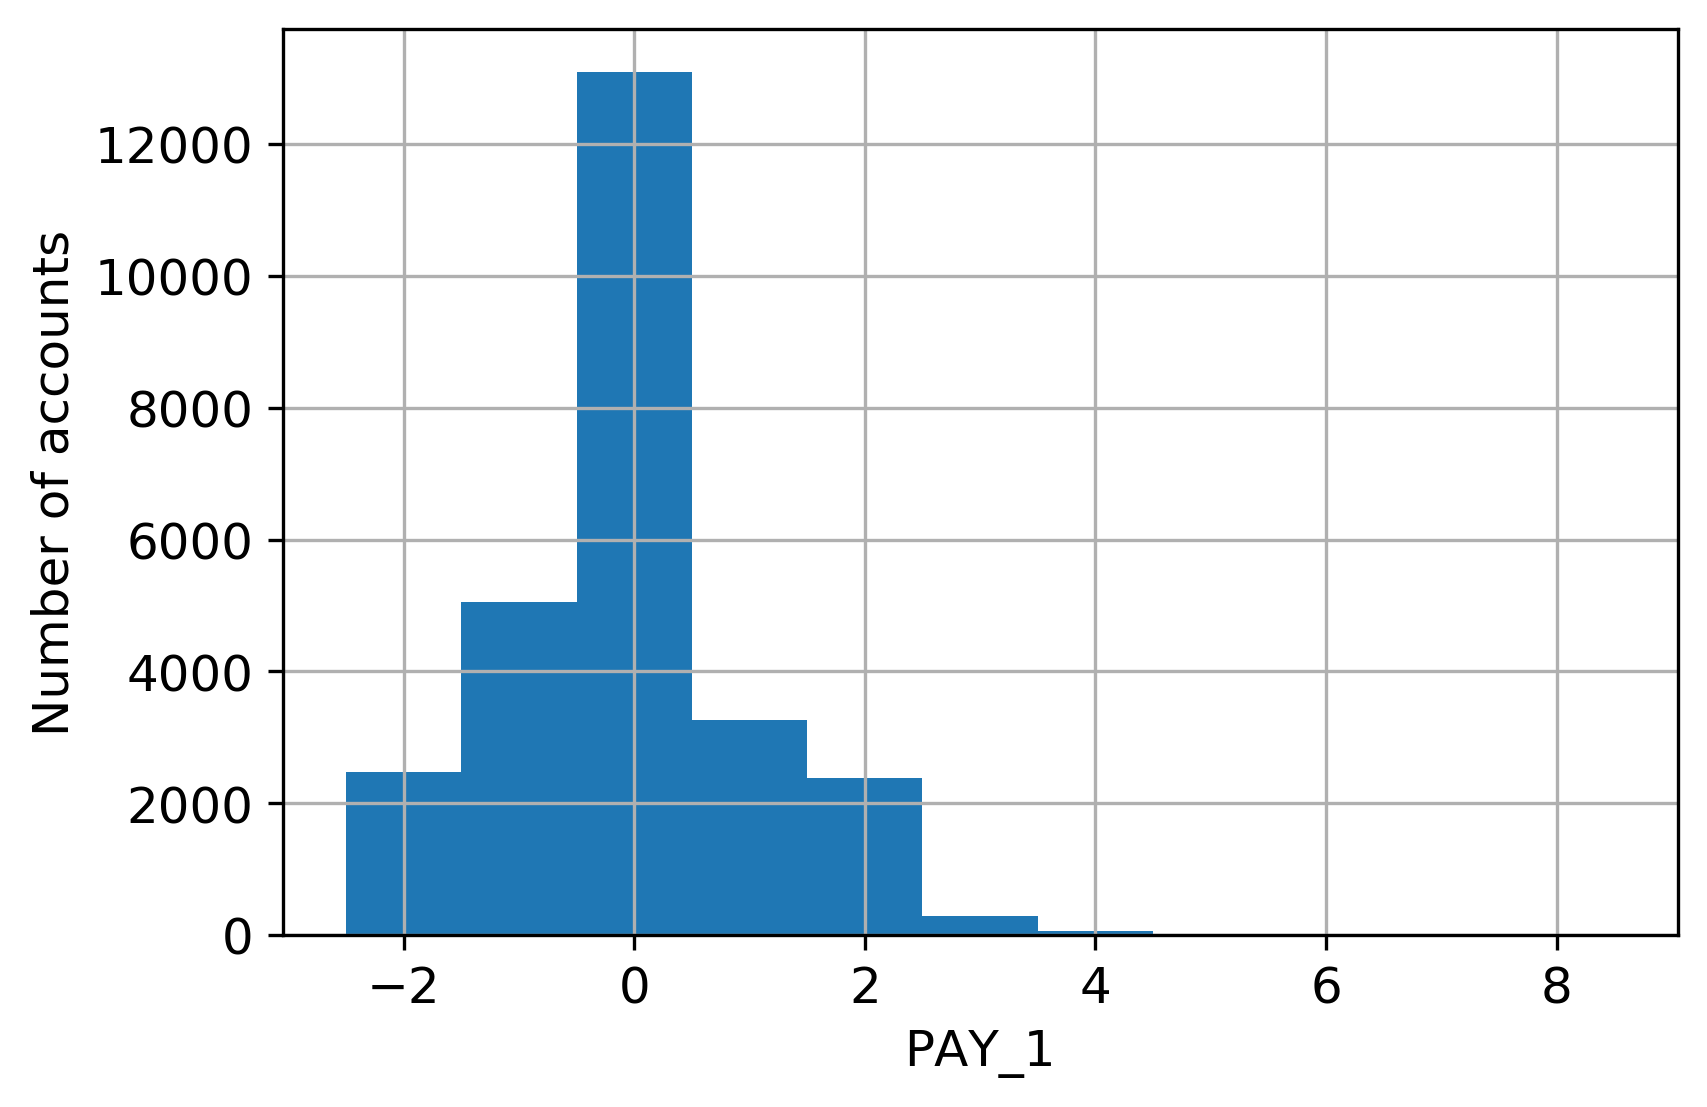

In [13]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

In [14]:
for feat in pay_feats:
    print(df[feat].value_counts().sort_index())

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: PAY_3, dtype: int64
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: PAY_4, dtype: int64
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: PAY_5, dtype: int64
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: PAY_6, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1def0390>,
      dtype=object)

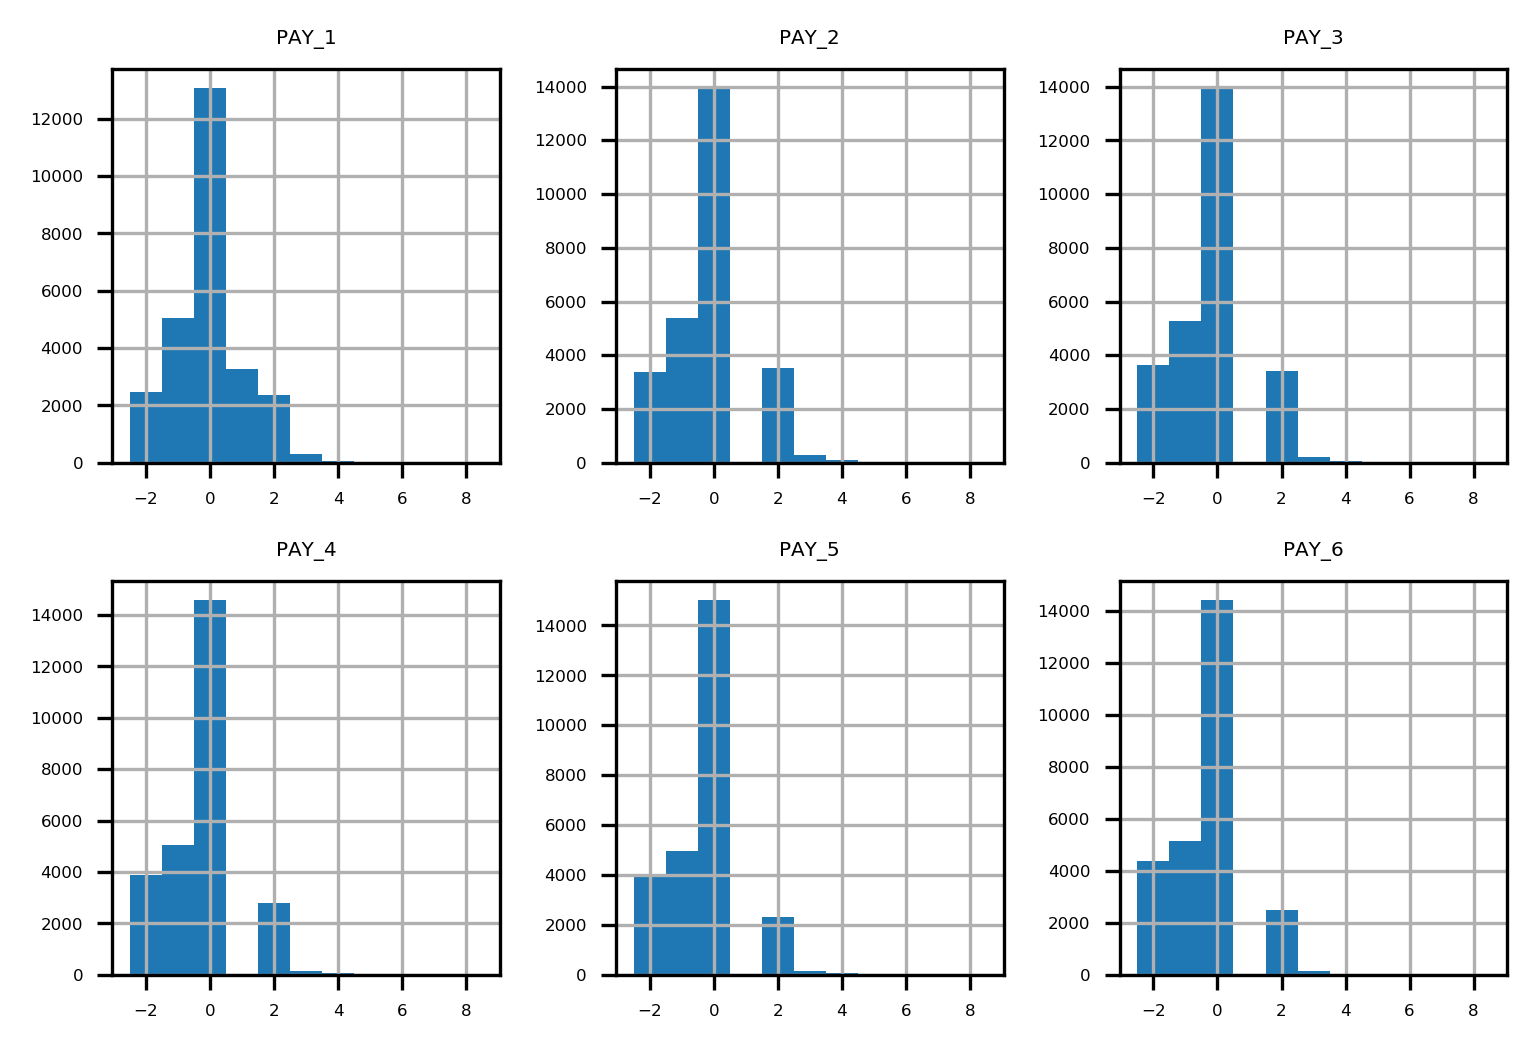

In [15]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In July, there are very few accounts that had a 1-month payment delay; this bar is not really visible in the histogram. However, in August, there are suddenly thousands of accounts with a 2-month payment delay. This does
not make sense: the number of accounts with a 2-month delay in a given month should be less than or equal to the number of accounts with a 1-month delay in the previous month. it's clear that accounts with a 2-month delay in August have nonsensical values for the July payment status. The only way to progress to a 2-month delay should be from a 1-month delay the previous month, yet none of these accounts indicate that. This could be a possible problem in the collection or recording of the data.

In [17]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()



,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [18]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [19]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1edd17f0>,
      dtype=object)

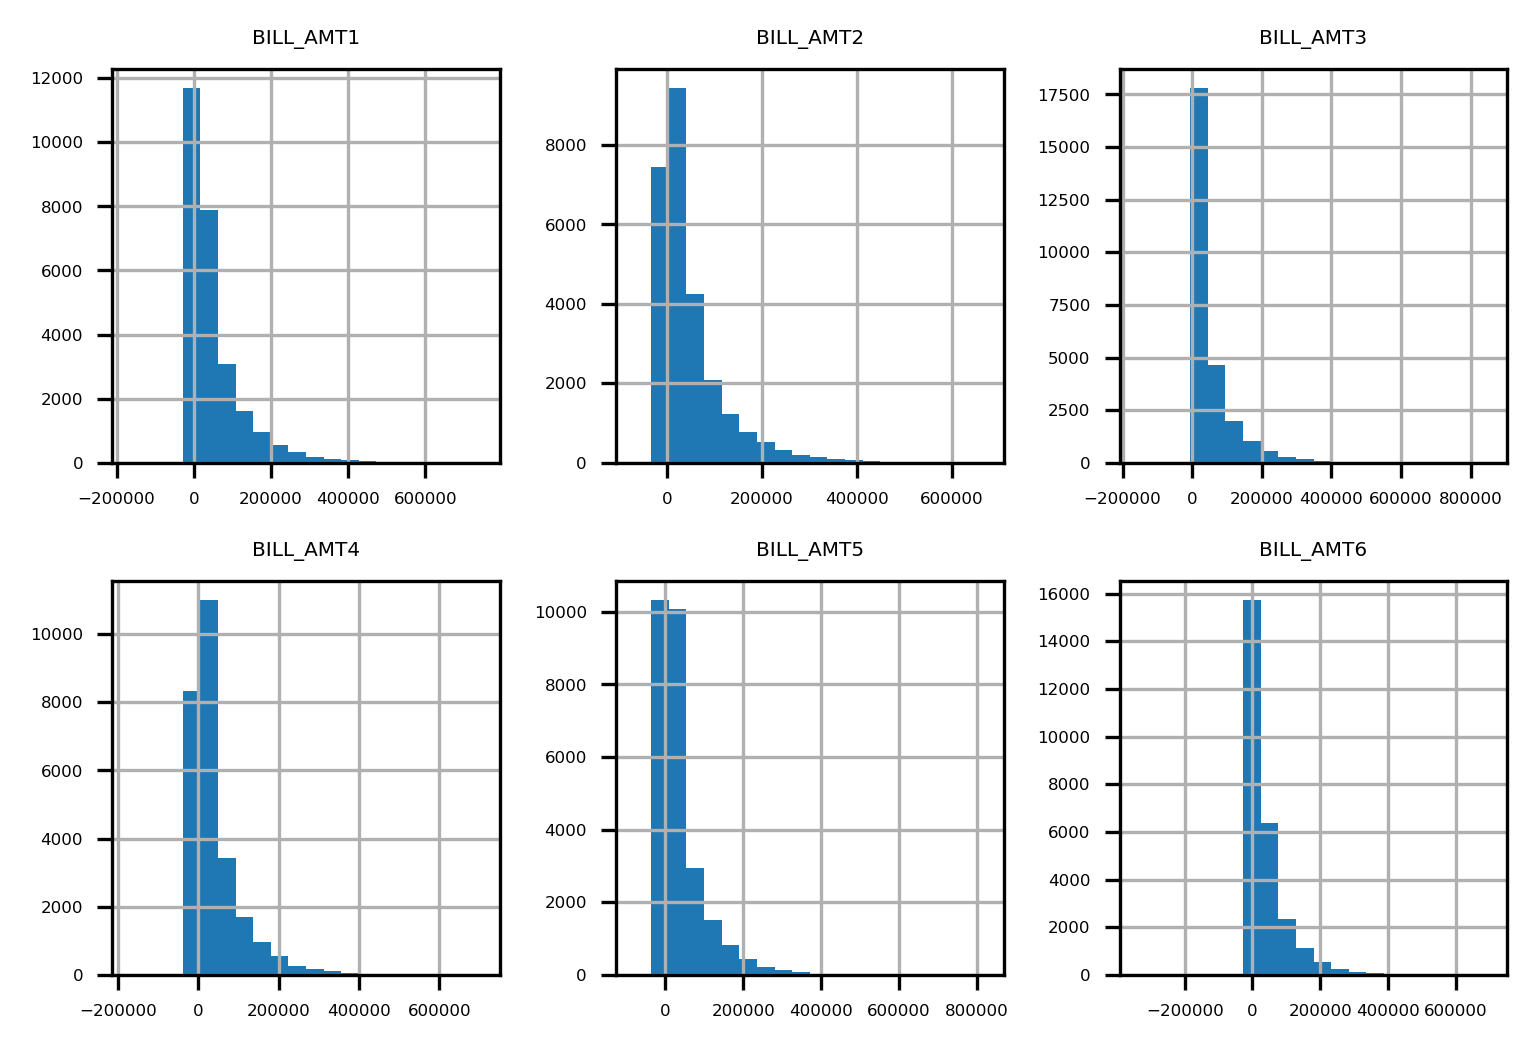

In [20]:
df[bill_feats].hist(bins=20, layout=(2,3))

In [21]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1edd1dd8>,
      dtype=object)

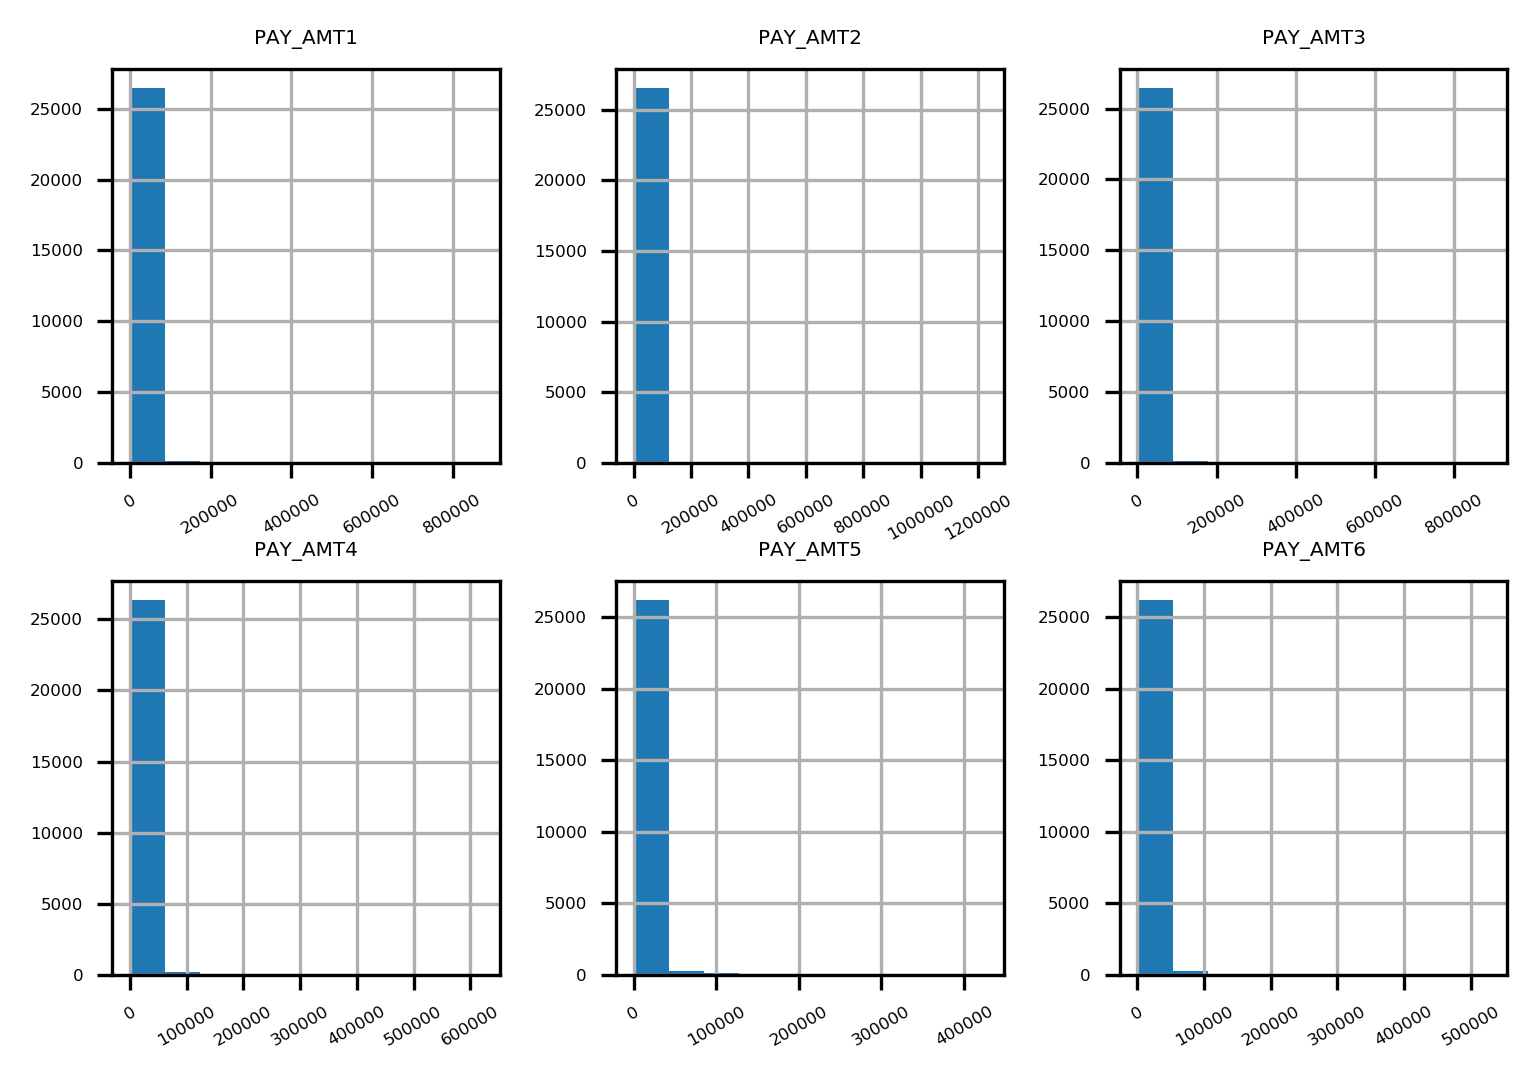

In [22]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

A quick glance at this figure indicates that this is not a very informative graphic; there is only one bin in most of the histograms that is of any noticeable height. This is not an effective way to visualize this data. It appears that the monthly payment amounts are mainly in a bin that includes 0.

In [23]:
pay_zero_mask = df[pay_amt_feats] == 0

In [24]:
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [25]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a213a6f28>,
      dtype=object)

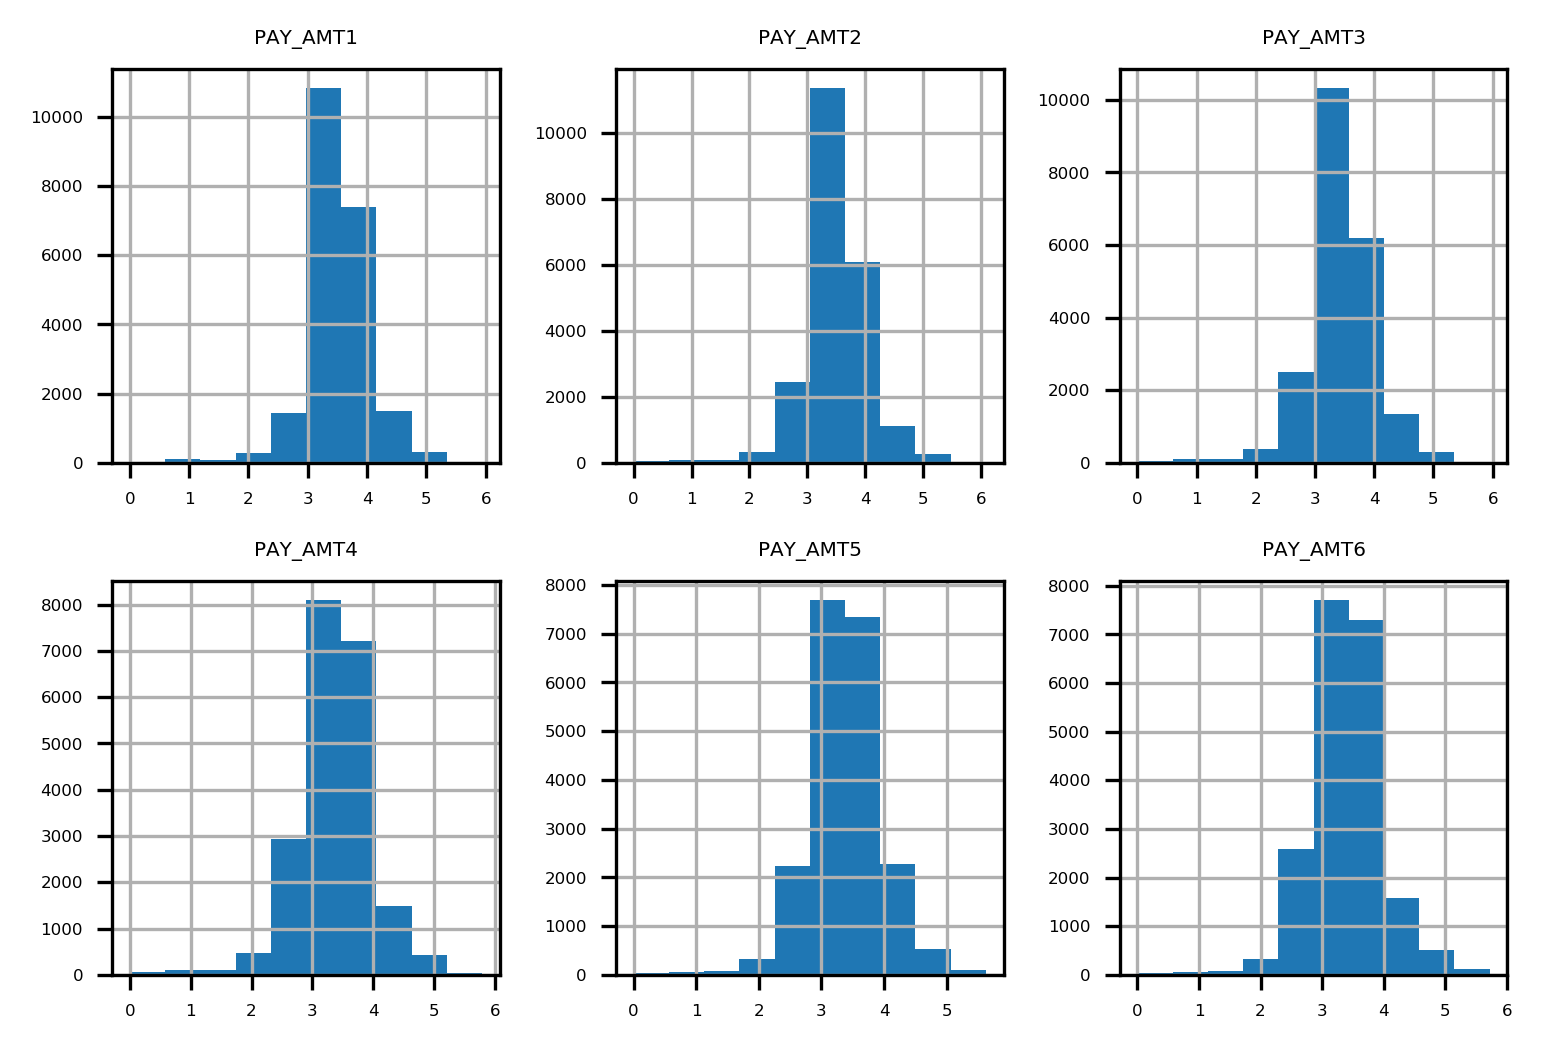

In [26]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))


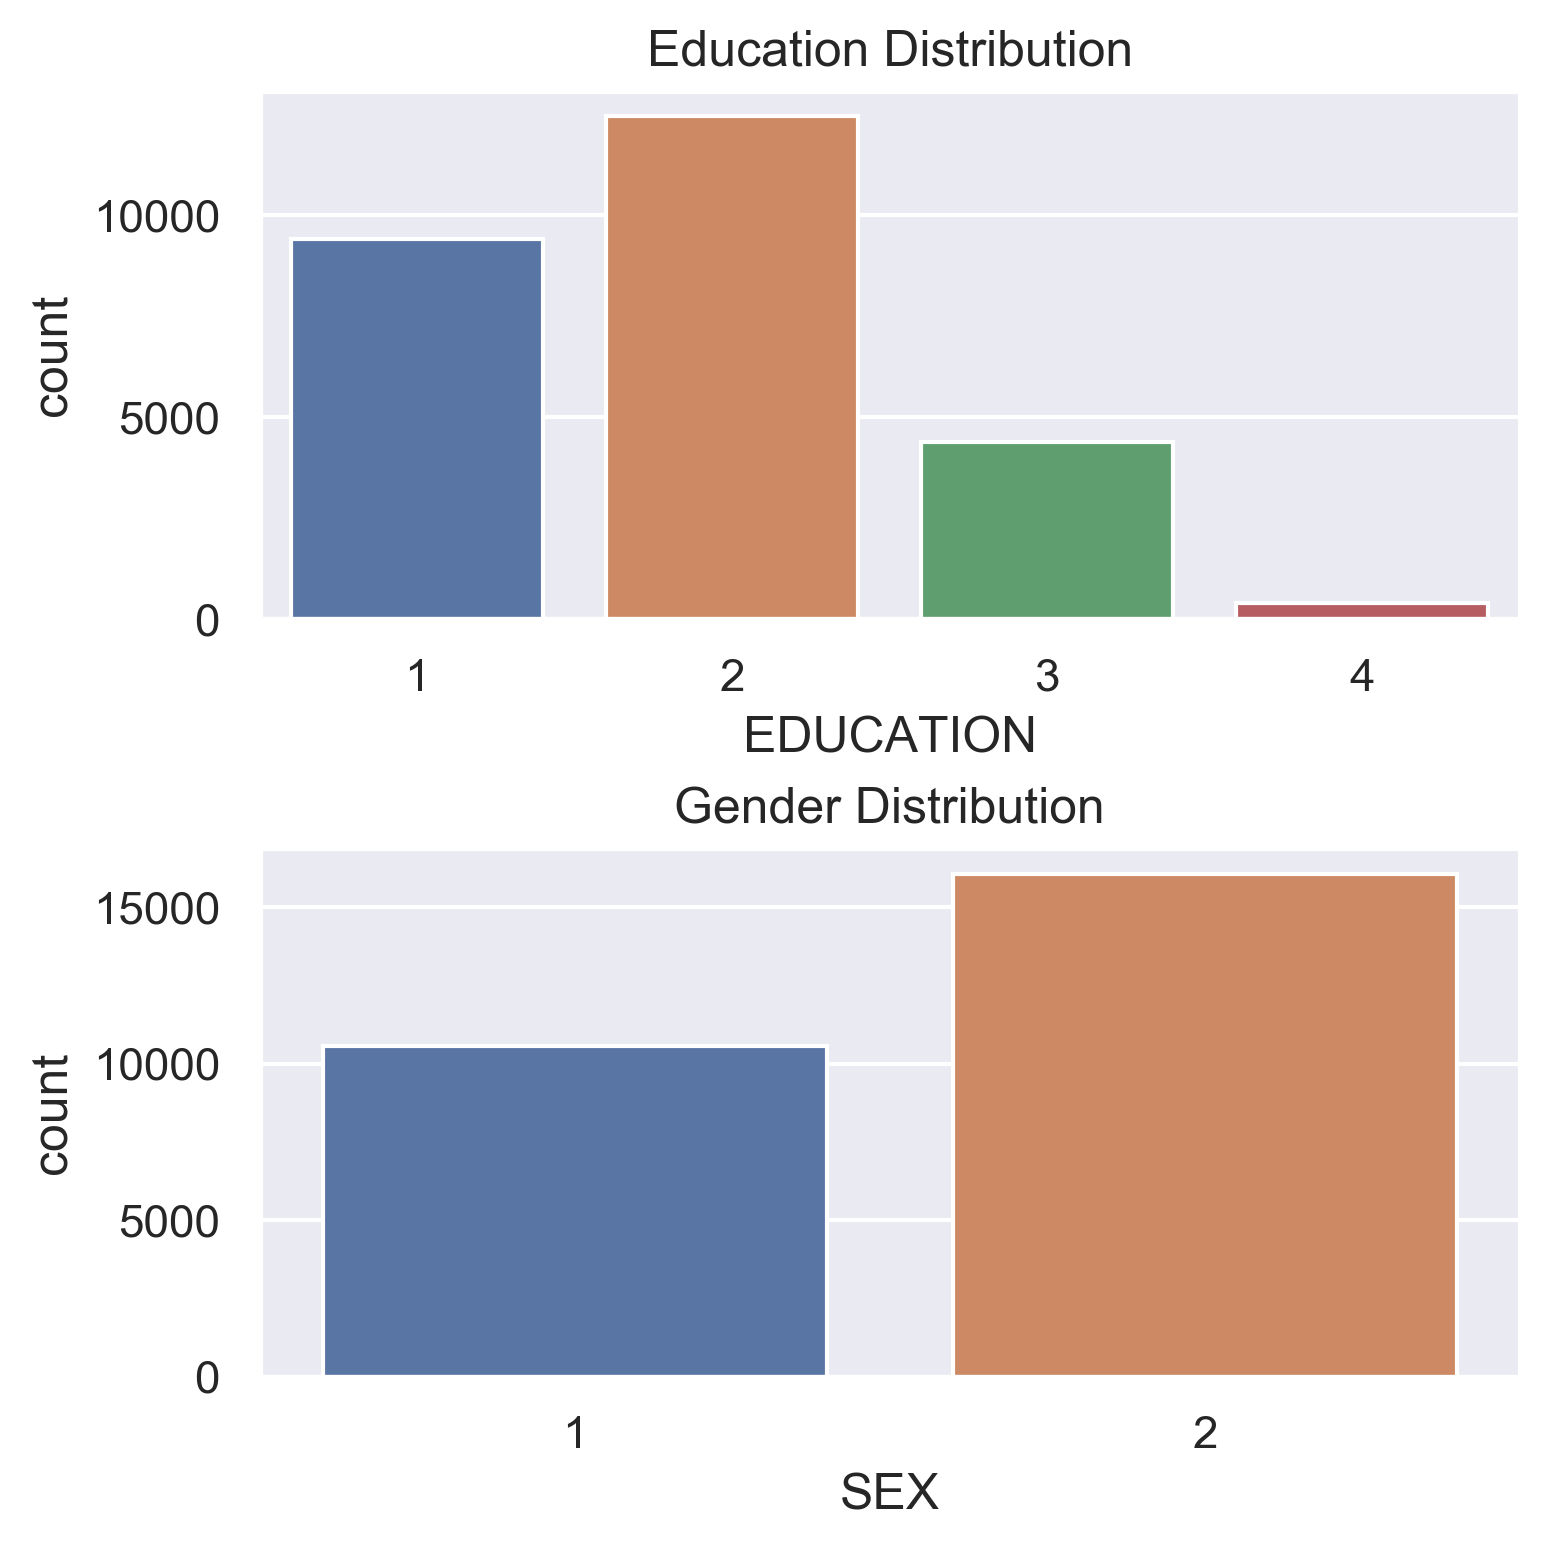

In [27]:
sns.set(font_scale=1)  

figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(5,5))
sns.countplot(x='EDUCATION',data=df,ax=ax[0])
ax[0].set_title('Education Distribution')

sns.countplot(x='SEX',data=df,ax=ax[1])
ax[1].set_title('Gender Distribution')
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=0.5)

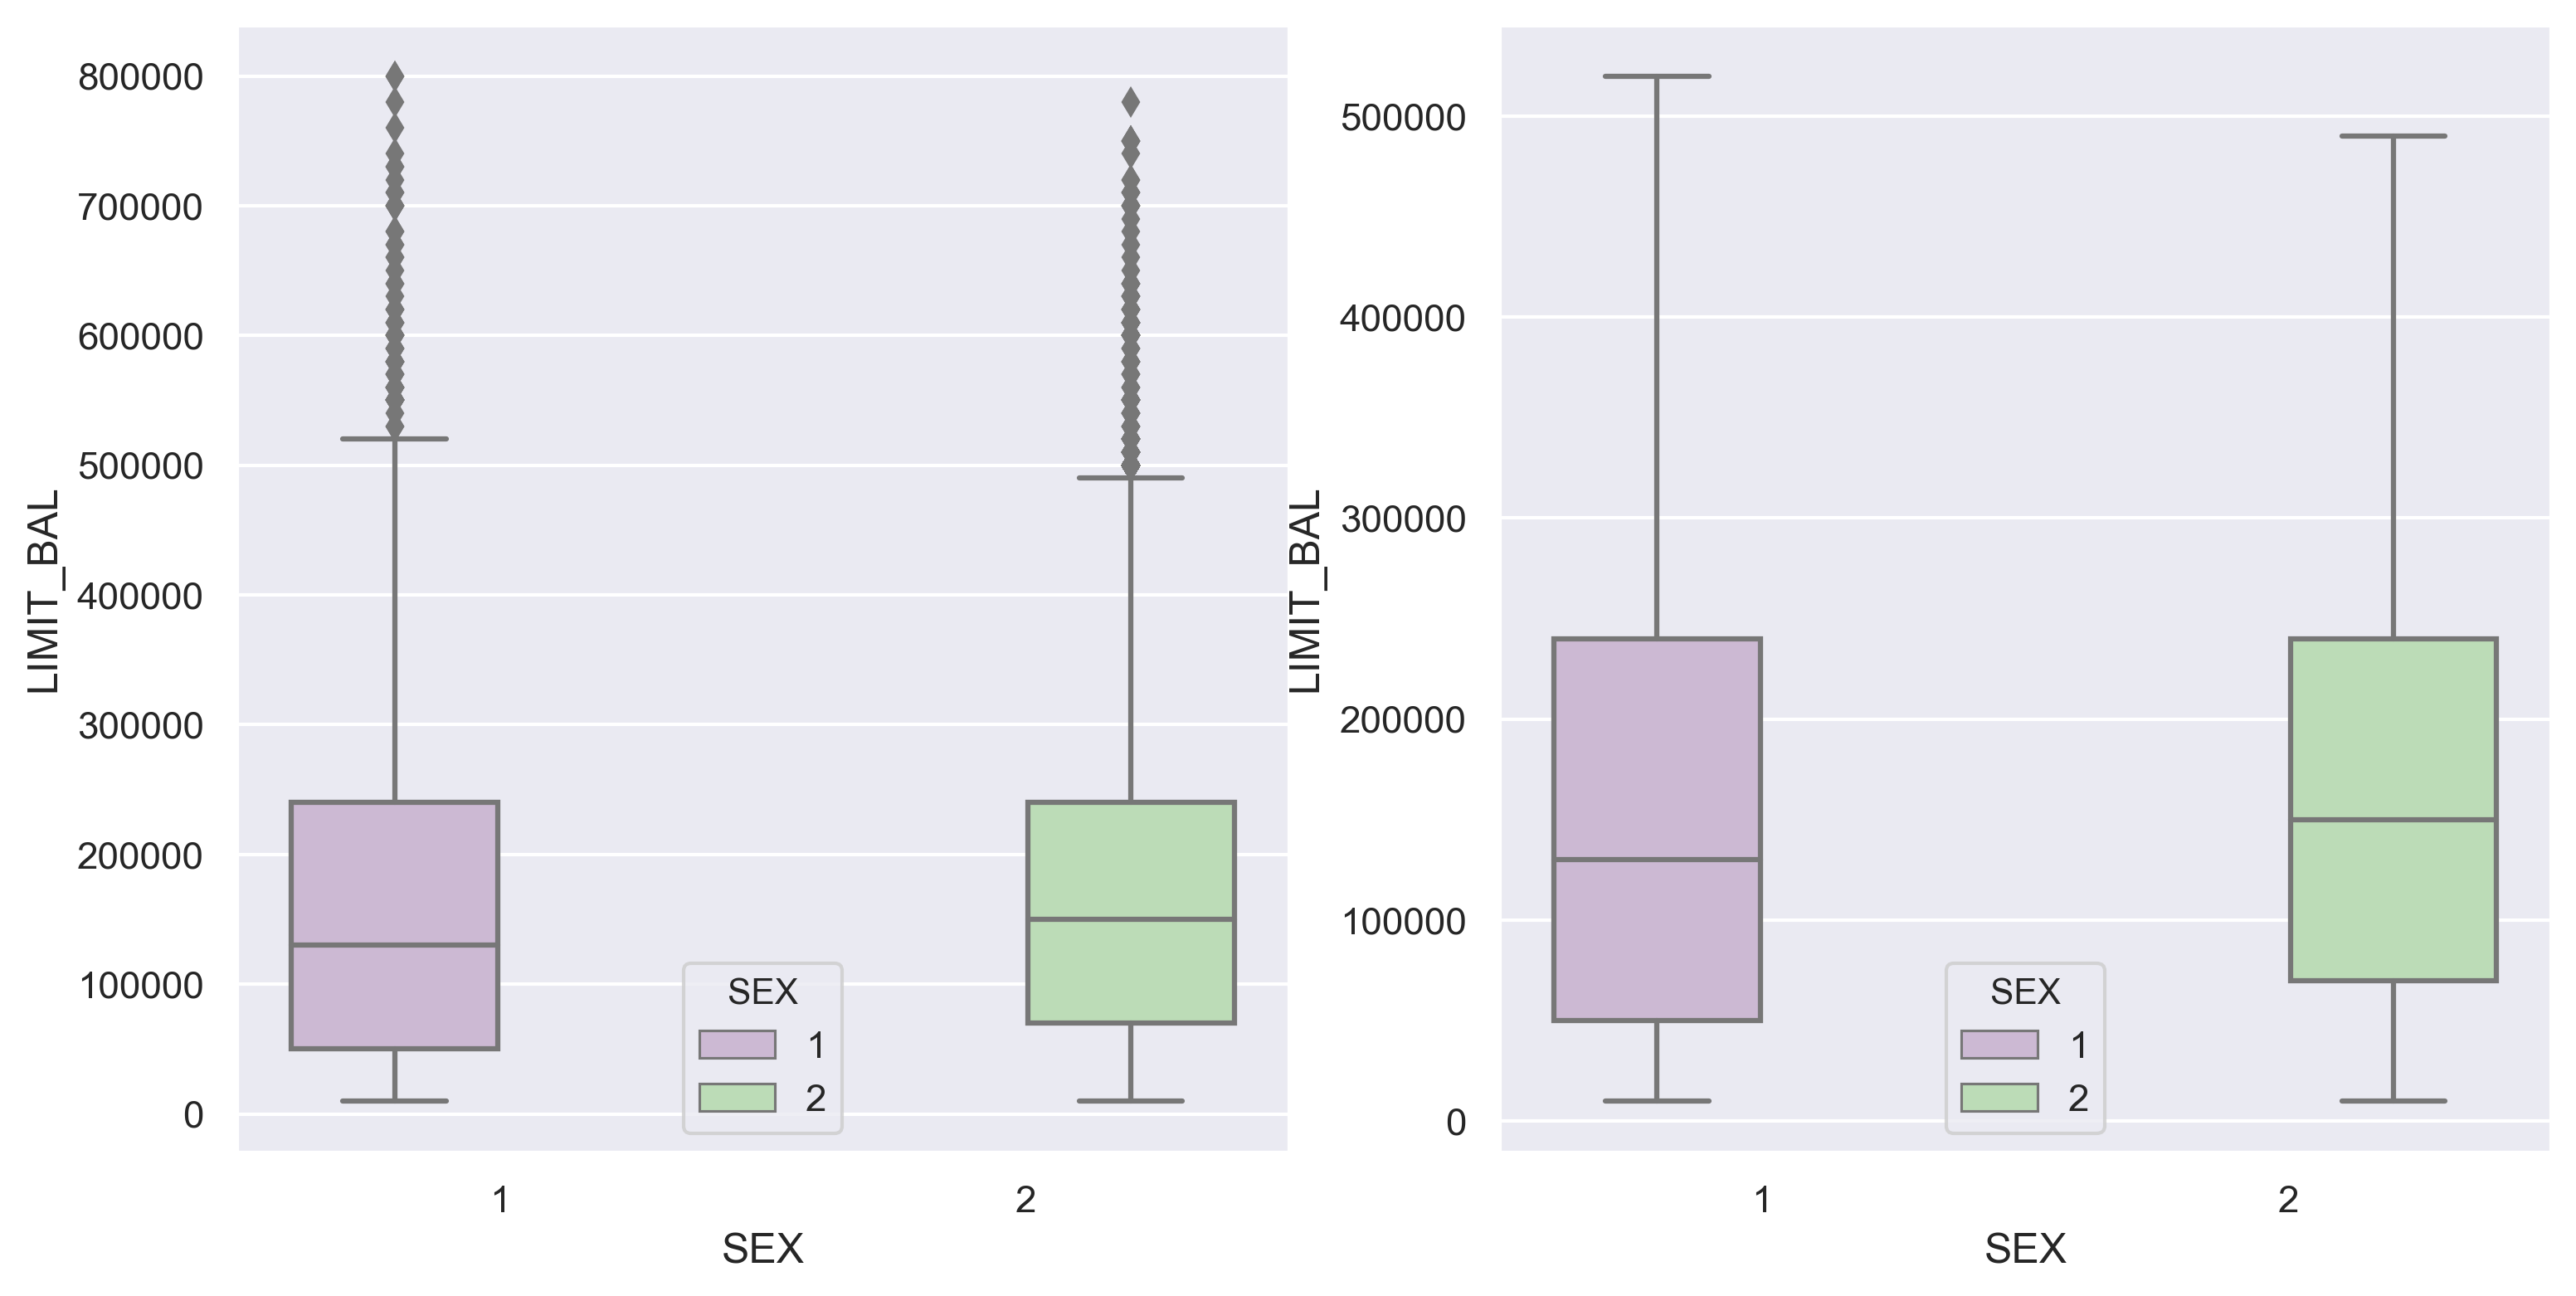

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

In [29]:
corr = df.corr(method ='pearson') 
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157,-0.273396,-0.296471,-0.286613,-0.269296,-0.249555,-0.236037,0.287009,0.279289,0.285299,0.294342,0.295198,0.289818,0.194820,0.188049,0.207638,0.202795,0.218082,0.221305,-0.154423,0.260582,-0.139678,0.012190,-0.148892
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421,-0.058993,-0.070828,-0.067869,-0.060820,-0.055418,-0.043668,-0.032336,-0.029682,-0.023217,-0.019970,-0.015168,-0.014406,0.002964,-0.002285,-0.011542,-0.000199,0.000081,-0.003342,-0.039945,-0.022777,-0.005669,0.007646,0.024133
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035,0.112653,0.129558,0.124114,0.118464,0.105290,0.088835,0.016156,0.012307,0.007683,-0.005862,-0.013174,-0.012670,-0.040092,-0.033610,-0.042349,-0.039319,-0.044946,-0.046859,0.034966,-0.835517,0.689244,0.363889,0.198278
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828,0.019759,0.025096,0.034308,0.033082,0.036830,0.033366,-0.028610,-0.026009,-0.029192,-0.027740,-0.029895,-0.024414,-0.002951,-0.007548,-0.003408,-0.014387,-0.000410,-0.009461,-0.026030,0.137198,-0.092283,-0.009422,-0.060549
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000,-0.044277,-0.054053,-0.055795,-0.054972,-0.059438,-0.053532,0.056245,0.054099,0.054107,0.051241,0.049701,0.047519,0.025437,0.025421,0.029876,0.025307,0.020541,0.021640,0.014334,-0.096956,0.229301,0.008181,-0.079443
PAY_1,-0.273396,-0.058993,0.112653,0.019759,-0.044277,1.000000,0.675430,0.575617,0.539238,0.509140,0.475740,0.185826,0.188799,0.181257,0.178812,0.180438,0.177486,-0.081450,-0.073295,-0.072682,-0.064112,-0.057021,-0.061031,0.325365,-0.142688,0.059008,-0.024941,0.099034
PAY_2,-0.296471,-0.070828,0.129558,0.025096,-0.054053,0.675430,1.000000,0.764960,0.659844,0.620211,0.574122,0.233781,0.234120,0.226327,0.221877,0.220758,0.219289,-0.083251,-0.059088,-0.057972,-0.047047,-0.035798,-0.038711,0.263649,-0.169756,0.063009,-0.032340,0.123824
PAY_3,-0.286613,-0.067869,0.124114,0.034308,-0.055795,0.575617,0.764960,1.000000,0.776238,0.686325,0.632940,0.207819,0.237636,0.229639,0.227038,0.224623,0.221822,0.000774,-0.071311,-0.055098,-0.046136,-0.035672,-0.038332,0.238085,-0.161372,0.063176,-0.032780,0.115777
PAY_4,-0.269296,-0.060820,0.118464,0.033082,-0.054972,0.539238,0.659844,0.776238,1.000000,0.820401,0.715778,0.202165,0.225881,0.247123,0.245354,0.241584,0.237721,-0.011479,-0.003546,-0.070528,-0.044948,-0.034297,-0.030607,0.219889,-0.154019,0.058468,-0.028530,0.111178
PAY_5,-0.249555,-0.055418,0.105290,0.036830,-0.059438,0.509140,0.620211,0.686325,0.820401,1.000000,0.815597,0.206113,0.227525,0.247091,0.272785,0.270335,0.262737,-0.008093,-0.001857,0.010085,-0.057446,-0.033770,-0.026060,0.204948,-0.139655,0.049600,-0.027157,0.103665
